In [133]:
#importamos las liberias que ocuparemos
import sympy as sp
import tkinter as tk

# Resolvemos la Ecuación diferencial de variables separables

Escribimos la ecuación diferencial en términos que python pueda entender

In [134]:
#Definimos la ecuación diferencial a Integrar
M = sp.Function('M')
t = sp.Symbol('t')
k = sp.Symbol('k')
c = sp.Symbol('c')
C1 = sp.Symbol('C1')
leftPart = M(t).diff(t)
rightPart = k*(M(t))

ecuacionDif = sp.Eq(leftPart, rightPart)
ecuacionDif

Eq(Derivative(M(t), t), k*M(t))

In [135]:
#La expresamos en forma de un ED de variables separables
leftPart = leftPart/M(t)
rightPart = rightPart/M(t)
ecuacionDif = sp.Eq(leftPart, rightPart)
ecuacionDif

Eq(Derivative(M(t), t)/M(t), k)

Procedemos a integrar ambos lados de la ecuación diferencias respecto a la variable independiente t

$$\int \frac{dM(t)}{M(t)} =\int kdM(t)$$

In [136]:
#Integramos ambas partes de la ED respecto a t
leftPart = sp.integrate(leftPart,t)
rightPart = sp.integrate(rightPart ,t)
rightPart = rightPart + c
ecuacionDif = sp.Eq(leftPart, rightPart)
ecuacionDif

Eq(log(M(t)), c + k*t)

Aplicamos la función exponencia a ambos lados de la ecuación con el objetivo de quedarnos unicamente con la función $M(t)$ de lado izquierdo de la ecuación

In [137]:
#Aplicamos la función exponenecial a toda la ecuación
leftPart = sp.exp(leftPart)
rightPart = sp.exp(rightPart)
ecuacionDif = sp.Eq(leftPart, sp.expand(rightPart))
ecuacionDif

Eq(M(t), exp(c)*exp(k*t))

Renombramos el término $e^{c}$ como una nueva constante c, teniendo así la función solución de nuestra ecuación diferencial

$$M(t) = ce^{kt}$$

# Aplicación del módelo 

Dado que nuestro módelo requiere de una constante k, es necesario deducirla de alguna manera , por lo que se deben tener datos inciales respecto al problea al que se debe tratar en cuestion

In [139]:
#funcion para traer el valor de tiempo de la ventana
def close_window():
    window.destroy()

Pedimos tres datos:

    1.La cantidad del material que existe en un tiempo 0
    
    2.La cantidad del material original que se desintegro en un tiempo t
    
    3.El tiempo que dicho material tardo en desintegrarse

In [140]:
#Pedimos la cantidad del material existente en miligramos
while True:
    window = tk.Tk()
    window.geometry("350x150")
    window.title("hola")
    window.resizable(False,False)
    text = tk.Label(window,text = "DIGITA LA CANTIDAD DE MASA INICIAL(EN MILIGRAMOS)")
    text.pack(pady =50)

    M0 = tk.StringVar()
    M0_entry = tk.Entry(textvariable = M0, width = "40")
    M0_entry.place(x =50,y =75)

    boton = tk.Button(window,text = "OK",command= close_window, width = "20",height = "1")
    boton.place(x =100 ,y =110)
    
    window.mainloop()

    if( float(M0.get()) > 0 ):
        break

In [141]:
#Pedimos la cantidad del material original que se ha desintegrado en miligramos
while True:
    window = tk.Tk()
    window.geometry("450x150")
    window.title("hola")
    window.resizable(False,False)
    text = tk.Label(window,text = "DIGITA LA CANTIDAD DE MASA ORIGINAL DESINTEGRADA (EN MILIGRAMOS)")
    text.pack(pady =50)

    Md = tk.StringVar()
    Md_entry = tk.Entry(textvariable = Md, width = "40")
    Md_entry.place(x =100,y =75)

    boton = tk.Button(window,text = "OK",command= close_window, width = "20",height = "1")
    boton.place(x =150 ,y =110)
    
    window.mainloop()

    if( float(Md.get()) > 0 ):
        break

In [142]:
#Pedimos el tiempo en el que la masa se ha desintegrado en años
while True:
    window = tk.Tk()
    window.geometry("450x150")
    window.title("hola")
    window.resizable(False,False)
    text = tk.Label(window,text = "DIGITA EL TIEMPO EN EL QUE LA MASA SE DESINTEGRO (EN AÑOS)")
    text.pack(pady =50)

    tiempo = tk.StringVar()
    tiempo_entry = tk.Entry(textvariable = tiempo, width = "40")
    tiempo_entry.place(x =100,y =75)

    boton = tk.Button(window,text = "OK",command= close_window, width = "20",height = "1")
    boton.place(x =150 ,y =110)
    
    window.mainloop()

    if( float(tiempo.get()) > 0 ):
        break

In [143]:
tiempo = float(tiempo.get())
masa_tiempoCero = float(M0.get())
masa_desintegrada = float(Md.get())

### Calculamos el valor de K para sustituirlo en nuestra ED

In [163]:
leftPart = M(t).diff(t)
rightPart = k*(M(t))

solution = sp.dsolve(leftPart-rightPart)
solution

Eq(M(t), C1*exp(k*t))

Sabemos que al tiempo cero tenemos $masa\_tiempoCero$ y que al $tiempo$ en años la masa que se desintegró fueron $masa\_tiempoT$ por lo que nuestra condicion inicial es $M(tiempo) = masa\_tiempoCero-masa\_desintegrada $

In [145]:
masa_tiempoT = masa_tiempoCero-masa_tiempoT

Evaluamos la función solución de la Ecuación diferencial en el $Tiempo$ y reemplazamos la masa (constante c) por la $masa\_tiempoCero$ 

In [146]:
solution = solution.subs(t, tiempo)
solution = solution.subs(C1, masa_tiempoCero)
solution

Eq(M(2.0), 100.0*exp(2.0*k))

In [147]:
solution = solution.subs(M(2.0),masa_tiempoT)
solution

Eq(95.0, 100.0*exp(2.0*k))

Aplicamos la función logaritmo a nuestra ecuación

In [156]:
leftSide = sp.log( sp.exp(2*k),sp.exp(1))
rightSide = sp.log(95/100,sp.exp(1))
solution = sp.Eq(leftSide,rightSide)
solution

Eq(log(exp(2*k)), -0.0512932943875506)

leftSide = 2*k
solution = sp.Eq(leftSide,rightSide)
solution

In [162]:
solution = sp.Eq(leftSide/2,rightSide/2)
solution

Eq(k, -0.0256466471937753)

Reemplazamos el valor de k en la Ecuacion diferencial Original

In [165]:
leftPart = M(t).diff(t)
rightPart = k*(M(t))
solution = sp.dsolve(leftPart-rightPart)
solution = solution.subs(k,rightSide/2)
solution

Eq(M(t), C1*exp(-0.0256466471937753*t))

## Graficamos la función solución

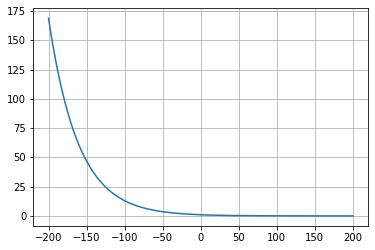

In [189]:
t = linspace(-200,200,1000)          #arreglo de 1000 numeros reales entre -200 y 200

#exponencial y logaritmo
figure(1)

y =  exp( -0.0256466471937753*𝑡)           #funcion exponencial
plot(t,y)                         

grid('on')